###  Finite square well analytical solution 

The Hamiltonian $H = -\frac{\hbar^2}{2m}\frac{d^2}{dx^2} + V(x)$ can first be be used to write the Schrodinger equation $H\psi = E\psi$ as 

$$\left(-\frac{\hbar^2}{2m}\frac{d^2}{dx^2} +V(x) \right)\psi(x) = E \psi(x)$$

We can rewrite this as

$$\left(-\frac{d^2}{dx'^2} +\frac{2ma^2}{\hbar^2}V(x') \right)\psi(x') = \frac{2ma^2}{\hbar^2}E \psi(x')$$

where $x'=x/a$. Now the well goes from -1 to 1 as opposed to $-a$ to $a$. We can then define $V'= \frac{2ma^2}{\hbar^2}V$ and $E'=\frac{2ma^2}{\hbar^2}E$ to make the problem simpler:


$${\left(-\frac{d^2}{dx'^2} + V' \right)\psi(x') = E' \psi(x')}$$

    
But we still have that pesky $V_0$ to deal with. Noting that $V' = V/(\frac{\hbar^2}{2ma^2})$ we have that $V_0=-V_0' \cdot \frac{\hbar^2}{2ma^2}$ inside the well. ($V_0'$ is a dimensionless number that tells you how many $\frac{\hbar^2}{2ma^2}$s there are in $V_0$). 

In summary:



1. Determine $V'$ inside the well using $V_0' = V_0/(\frac{\hbar^2}{2ma^2})$
2. Solve the eigenvalue equation above for (dimensionless) energies $E'$; the energies are given by $E=\frac{\hbar^2}{2ma^2}E'$
3. The obtained eigenfunctions $\psi(x')$ (where $x'=x/a$ is dimenionless) can be used to find the true eigenfunctions using the scale transformation $\psi(ax') = \psi(x)$
    


**For notational simplification, we will now drop all the primes, but remember that the 3 steps above need to be followed.**

Suppose we only care about bound energies where $-V_0<E<0$. As such, for example, $\sqrt{-E}$ is real. 

 **Inside**:</span> $\left(-\frac{d^2}{dx^2} -V_0 \right)\psi = E \psi \hspace{10mm} \implies \hspace{20mm}$ $\boxed{\frac{d^2\psi}{dx^2} = -k^2 \psi} \hspace{10mm} \text{where} \hspace{10mm} k=\sqrt{E+V_0}$

**Outside**:</span> $\left(-\frac{d^2}{dx^2}\right)\psi = E \psi \hspace{10mm} \implies \hspace{20mm} $ $\boxed{\frac{d^2\psi}{dx^2} = l^2 \psi} \hspace{10mm} \text{where} \hspace{10mm} l=\sqrt{-E}$ 

Since the Hamiltonian is symmetric in $x$, the solutions are either even functions or odd functions (this is a quantum fact that you can prove). The solutions are thus

$$\psi_{\text{even}}(x) = \begin{cases}Ae^{lx}&x<-1\\ D\cos(kx)&-1\leq x \leq 1\\ Ae^{-lx}&x>1  \end{cases}$$

$$\psi_{\text{odd}}(x) = \begin{cases}Ae^{lx}&x<-1\\ C\sin(kx)&-1\leq x \leq 1\\ Ae^{-lx}&x>1  \end{cases}$$

The boundary conditions are that $\psi$ and $d\psi/dx$ are continuous at the boundaries $-1$ and $1$.

**Even**: $D\cos(k) = Ae^{-l}$ and $-kD\sin(k) = -lAe^{-l}$. Dividing these yields $k\tan(k) = l$ and thus

<span style="color: red;">$$\boxed{\sqrt{E+V_0}\tan(\sqrt{E+V_0}) = \sqrt{-E}}$$</span>

**Odd**: $C\sin(k) = Ae^{-l}$ and $kC\cos(k) = -lAe^{-l}$. Dividing these yields $k\cot(k) = -l$ and thus

<span style="color: red;">$$\boxed{-\sqrt{E+V_0}\cot(\sqrt{E+V_0}) = \sqrt{-E}}$$</span>

In [31]:
import numpy as np
import matplotlib.pyplot as plt


In [32]:
# computing energies 

v0 = 36
E = np.linspace(-v0,0,100000)

Text(0.5, 0, '$E$')

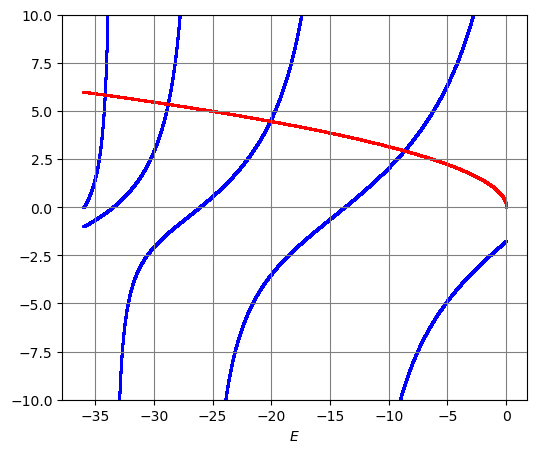

In [33]:
# get the left and right hand sides of the above two (boxed) equations 
RHS = np.sqrt(-E)                                  # RHS 
LHS1 = np.sqrt(E+v0) * np.tan(np.sqrt(E+v0))       # LHS of first equation 
LHS2 = -np.sqrt(E+v0)/np.tan(np.sqrt(E+v0+1e-9))   # LHS of the second eq. (we added small number to prevent 1/0 values)

# plot the curves defined above as a fucntion of E 
plt.figure(figsize=(6,5))
plt.scatter(E, LHS1, s=1, color='blue')
plt.scatter(E, LHS2, s=1, color='blue')
plt.scatter(E, RHS, s=1, color='red')
plt.ylim(-10,10)
plt.grid(color='grey')
plt.xlabel('$E$')


In [40]:
# re -defining the equations to get the RHS = 0 
# then we need to find the zero crossing of both odd and even functions 

def f1(E, V0):              # even solutions 
    return np.sqrt(E+V0)*np.tan(np.sqrt(E+V0)) - np.sqrt(-E)
def f2(E, V0, eps=1e-10):   # odd solutions 
    return np.sqrt(E+V0+eps)/np.tan(np.sqrt(E+V0+eps)) + np.sqrt(-E)


Text(0.5, 0, '$E$')

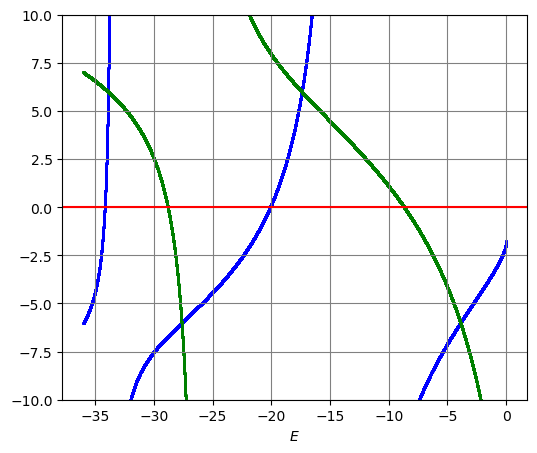

In [48]:
# plot f1 and f2 as a function of E (the zero crossings will be the solutions)
plt.figure(figsize=(6,5))
plt.scatter(E,f1(E,v0), s=1, color='blue')
plt.scatter(E,f2(E,v0), s=1, color='green')
plt.axhline(y=0,c='r')
plt.grid(color='grey')
plt.ylim(-10,10)
plt.xlabel('$E$')

* In the above plot you can graphically see that there are 4 zero -crossings and hence 4 bound state energies 

* Note that the way we find them is by multiplying two consecutive numbers in each array, and if the multiplication is < 0 this indicate that there is zero crossing

* However we wan't to avoid the the situations where the function going to $ + \infty $ and coming back from $- \infty$

In [52]:
# let's find the zero-crossing energies 

f1s = f1(E,v0)
f2s = f2(E,v0)

zero_crossing_even = E[np.where((f1s[:-1]*f1s[1:] <0)*(np.abs(f1s[:-1])<1))[0]]
zero_crossing_odd  = E[np.where((f2s[:-1]*f2s[1:] <0)*(np.abs(f2s[:-1])<1))[0]]
all_zero_crossing = np.sort(np.concatenate([zero_crossing_even,zero_crossing_odd]))

In [53]:
all_zero_crossing

array([-34.19170192, -28.82440824, -20.11340113,  -8.68940689])